In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import networkx as nx

G = nx.Graph()     # 创建一个没有节点和边缘的空图表。

下面的内容来自官方文档：https://networkx.github.io/documentation/stable/tutorial.html

根据定义, `Graph` 是节点 (顶点) 的集合, 以及已识别的节点对 (称为边、链接等)。在 NetworkX 中, 节点可以是任何 hashable 对象, 例如文本字符串、图像、XML 对象、另一个图形、自定义节点对象等。

> 注意：Python 的 `None` 对象不应用作节点, 因为它决定了是否在许多函数中分配了可选函数参数。

# 节点

图 G 可以用几种方式扩展。NetworkX 包括许多图形生成器功能和设备, 用于读写图形的多种格式。开始, 虽然我们将看看简单的操作。您可以:
## 一次添加一个节点

G.add_node(1)

## 添加节点列表

In [3]:
G.add_nodes_from([2, 3])

或添加任何 `iterable` 容器的节点。如果容器生成 $2$ 元组 `(node、node_attribute_dict)`, 也可以添加节点属性以及节点特性。下面将讨论节点属性。

In [4]:
H = nx.path_graph(10)
G.add_nodes_from(H)

请注意, G 现在包含 H 的节点作为 G 的节点。相比之下, 您可以将` graph` H 当作 G 中的节点。

In [5]:
G.add_node(H)

图 G 现在包含 H 作为一个节点。这种灵活性是非常强大的, 因为它允许图表图表, 文件图, 函数图和更多实体作为 `node`。考虑如何构造应用程序, 以便节点能够当作有用的实体是一件有意义的事情。当然, 您可以在 G 中使用唯一标识符, 如果您愿意, 还可使用一个由标识符对节点信息进行键控的独立字典的来操控 `node`。

**如果哈希取决于其内容, 则不应更改该节点对象。**

# Edges（边）

**G 也可以通过在一次添加一个边来扩展**

In [6]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

**通过添加 「边」 列表**

In [7]:
G.add_edges_from([(1,2),(1,3)])

**或者通过添加任何 ebunch 来添加边，一个 ebunch 是任何可迭代的边的元组，一个边的元组可以是两个节点之间的一个 $2$ 元组（无权值的边）或者 $3$ 元组（$3$ 元组还有一个元素是边的权值，比如`(1,2,{‘weight’:100})`）**。下面将进一步讨论边的属性：

In [8]:
G.add_edges_from(H.edges())   # 不能写作 G.add_edges_from(H)

我们可以用类似的方法拆除图： 
```py
G.remove_node(),G.remove_nodes_from(),G.remove_edge(),G.remove_edges_from() 
```
比如：

In [9]:
G.remove_node(H)

如果你添加的节点和边是已经存在的，是不会报错的。比如，我们先将图 G 里的所有节点和边删除：

In [10]:
G.clear()

然后我们新的节点和边，NetworkX 会自动忽略掉已经存在的边和节点的添加：

In [11]:
G.add_edges_from([(1,2),(1,3)])

G.add_node(1)

G.add_edge(1,2)

G.add_node("spam")       # 添加节点"spam"

G.add_nodes_from("spam") # 添加节点's' 'p' 'a' 'm'

此时图 G 一共有 $8$ 个节点和 $2$ 条边。 

In [12]:
print(G.number_of_nodes())

print(G.number_of_edges())

8
2


我们可以检查节点和边缘。四基本图属性: `G.nodes`, `G.edges`, `G.adj`，`G.degree`。这些是图表中的**节点**、**边**、**邻居** (**周边**) 和节点的**度数**的 `set-like` 视图。它们提供了一个不断更新的只读视图到图形结构中。它们也是 `dict-like`, 您可以通过视图（`view`）查找节点和边数据属性, 并使用方法迭代数据属性 `.items()`, `.data('span')`。如果需要特定容器类型而不是视图, 可以指定一个。在这里, 我们使用列表, 虽然集合、dicts、元组和其他容器在其他上下文中可能会更好。

In [13]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [14]:
list(G.edges)

[(1, 2), (1, 3)]

In [15]:
list(G.adj[1])  # or list(G.neighbors(1))

[2, 3]

In [16]:
G.degree[1]  # the number of edges incident to 1

2

**可以指定使用 `nbunch` 报告所有节点的子集的边和度数。`nbunch` 是: `None` (表示所有节点)、节点或节点的 iterable 容器, 而不是该关系图中的节点。**

In [17]:
G.edges([2, 'm'])

EdgeDataView([(2, 1)])

In [18]:
G.degree([2, 3])

DegreeView({2: 1, 3: 1})

可以用类似的方式从图表中移除节点和边缘以添加。使用方法 `Graph.remove_node()`, `Graph.remove_nodes_from()`, `Graph.remove_edge()` 和 `Graph.remove_edges_from()` , 例如

In [19]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)

[1, 3, 'spam']

In [20]:
G.remove_edge(1, 3)

当通过实例化一个图形类来创建图形结构时, 可以用多种格式指定数据。

In [21]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
list(H.edges())

[(1, 2), (2, 1)]

In [22]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)

# 可用作节点和边的内容

您可能注意到节点和边未指定为 NetworkX 对象。这使您可以自由地使用有意义的项作为节点和边。最常见的选择是数字或字符串, 但节点可以是任何 hashable 对象 (除了`None`), 边可以与任何使用任何与 `x` 关联的 `G.add_edge(n1, n2, object=x)`。

例如, `n1` 和 `n2` 可能是 RCSB 蛋白数据库中的蛋白质对象, `x` 可以参考出版物的 XML 记录, 详细说明它们相互作用的实验性观察。

我们发现这种力量相当有用, 但是如果你不熟悉 Python, 它的滥用会导致意想不到的意外。如果有疑问, 请考虑使用 `convert_node_labels_to_integers()` 获取具有整数标签的更传统的图表。

# 访问边和邻居
除了视图 `Graph.edges()`和 `Graph.adj()`, 还可以使用**下标**表示法可以访问边和邻居。

In [23]:
G[1]  # same as G.adj[1]

AtlasView({2: {}})

In [24]:
G[1][2]

{}

In [25]:
G.edges[1, 2]

{}

如果边已经存在, 可以使用下标表示法**获取/设置**边的属性。

In [26]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"

对所有 `(节点, 邻接)` 对的快速检查是通过 `G.adjacency()` 或 `G.adj.items()` 来实现的。注意, 对于无向图, 邻接迭代会看到每个边两次。

In [27]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: 
            print('(%d, %d, %.3f)' % (n, nbr, wt))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


通过边的属性实现对所有边的方便访问。

In [28]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print('(%d, %d, %.3f)' % (u, v, wt))

(1, 2, 0.125)
(3, 4, 0.375)


# 向图形、节点和边缘添加属性

**属性** (如权重、标签、颜色或任何您喜欢的 Python 对象) 可以附加到图形、节点或边缘。

每个图形、节点和边都可以在关联的属性字典中保存键/值属性对 (必须是 hashable 键)。默认情况下, 这些属性为空, 但可以使用 `add_edge`、 `add_node` 或直接操作一个 `Graph` 的属性字典 `G.graph`、`G.nodes` 和 `G.edges`。

## 图属性

**创建新图形时分配图属性**

In [29]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

也可以稍后修改属性

In [30]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

## 节点属性

使用 `add_node()`、 `add_nodes_from()`或 `G.nodes` 添加节点属性

In [31]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [32]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

请注意, 将节点添加到 `G.nodes` 不会将其添加到图表中, 而是使用 `G.add_node()`添加新节点。边也同样类似。

## 边缘属性
使用 `add_edge()`、 `add_edges_from()` 或下标表示法添加/更改边缘属性。

In [33]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

特殊属性 `weight` 应该是数字, 因为它被算法使用（需要加权边）。

# 定向图

`DiGraph` 向图类提供了特定于定向边缘的附加属性, 如有向图 `DiGraph.out_edges()`、`DiGraph.in_degree()`、 `DiGraph.predecessors()`, `DiGraph.successors()` 等。为了允许算法轻松地使用两个类, 定向版本的 `neighbors()` 等效于 `successors()` , 而 `degree` 报告于 `in_degree` 和 `out_degree` , 即使这有时会感到不一致。

In [34]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [35]:
DG.degree(1, weight='weight')

1.25

In [36]:
list(DG.successors(1))

[2]

In [37]:
list(DG.neighbors(1))

[2]

Some algorithms work only for directed graphs and others are not well defined for directed graphs. Indeed the tendency to lump directed and undirected graphs together is dangerous. If you want to treat a directed graph as undirected for some measurement you should probably convert it using `Graph.to_undirected()` or with

In [38]:
H = nx.Graph(G)  # convert G to undirected graph

# Multigraphs

NetworkX 为图表提供了类, 允许在任意一对节点之间有多个边。 `MultiGraph` 和 `MultiDiGraph` 类允许您添加相同的边缘两次, 可能与不同的边缘数据。对于某些应用程序来说, 这可能是强大的, 但是许多算法在这样的图上没有很好的定义。结果有很好的定义, 例如, `MultiGraph.degree()` 我们提供的功能。否则, 您应该以使测量定义良好的方式转换为标准图形。

In [39]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [40]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

# 图生成器和图操作

除了构造图节点按节点或边, 它们还可以由

1. 应用经典图形操作, 如：

```py
subgraph(G, nbunch)      - induced subgraph view of G on nodes in nbunch
union(G1,G2)             - graph union
disjoint_union(G1,G2)    - graph union assuming all nodes are different
cartesian_product(G1,G2) - return Cartesian product graph
compose(G1,G2)           - combine graphs identifying nodes common to both
complement(G)            - graph complement
create_empty_copy(G)     - return an empty copy of the same graph class
convert_to_undirected(G) - return an undirected representation of G
convert_to_directed(G)   - return a directed representation of G
```

2. 使用一个经典的小图的调用, 例如
```py
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()
```

3. 使用一个 (建设性的) 生成器的经典图, 例如,
```py
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)
```

4. 使用随机图发生器, 例如,
```sh
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)
```
5. 读取存储在文件中的图形, 使用常用图形格式, 如边缘列表、邻接列表、GML、GraphML、pickle、LEDA 等。
```sh
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")
```

有关图表格式的详细信息, 请参阅[读写图](https://networkx.github.io/documentation/stable/reference/readwrite/index.html)和[图形生成器函数](https://networkx.github.io/documentation/stable/reference/generators.html)。

# 分析图

G 的结构可以使用各种图论函数进行分析, 如:

In [41]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [42]:
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [43]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

某些函数具有较大的输出迭代 `(节点、值)` $2$ 元组。如果你愿意, 这些很容易存储在 `dict` 结构中。

In [44]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

有关支持的图形算法的详细信息, 请参阅[算法](https://networkx.github.io/documentation/stable/reference/algorithms/index.html)。

# Drawing graphs

NetworkX 不主要是一个图形绘图包, 但基本绘图与 Matplotlib 以及一个接口, 使用开源 Graphviz 软件包包括在内。这些是 `networkx.drawing` 模块的一部分。

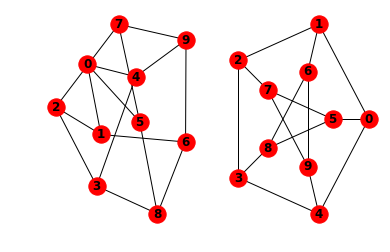

In [45]:
G = nx.petersen_graph()
plt.subplot(121)

nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

当绘图到交互式显示时。请注意, 您可能需要使用 `plt.show()`

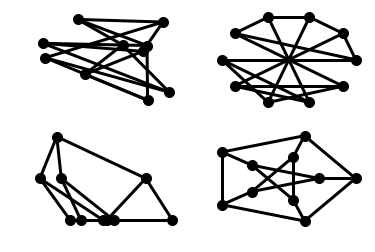

In [46]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
plt.subplot(221)

nx.draw_random(G, **options)
plt.subplot(222)

nx.draw_circular(G, **options)
plt.subplot(223)

nx.draw_spectral(G, **options)
plt.subplot(224)

nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

You can find additional options via `draw_networkx()` and layouts via layout. You can use multiple shells with `draw_shell()`.

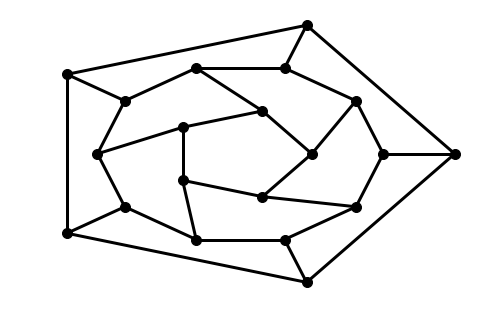

In [47]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

若要将绘图保存到文件, 请使用, 例如

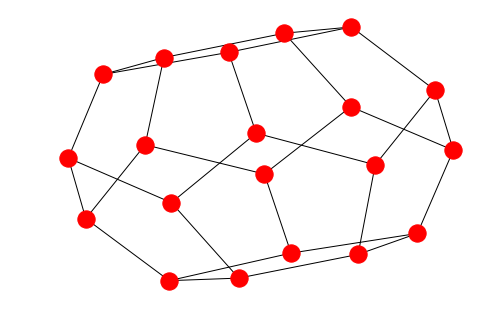

In [48]:
nx.draw(G)
plt.savefig("path.png")

writes to the file path.png in the local directory. If Graphviz and PyGraphviz or pydot, are available on your system, you can also use `nx_agraph.graphviz_layout(G)` or `nx_pydot.graphviz_layout(G)` to get the node positions, or write the graph in dot format for further processing.

In [49]:
import os

In [50]:
'C:/Program Files (x86)/Graphviz/bin/' in os.environ['PATH']

False

In [51]:
os.environ["PATH"] += 'C:/Program Files (x86)/Graphviz/bin/'

In [52]:
os.environ["PATH"]

'C:\\ProgramData\\Anaconda3\\DLLs;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Intel\\OpenCL\\sdk\\bin\\x64;C:\\Intel\\OpenCL\\sdk\\bin\\x86;C:\\Intel\\OpenCL\\sdk\\bin\\Pin;C:\\Intel\\OpenCL\\sdk\\bin\\GTPin;C:\\ProgramData\\Anaconda3;C:\\ProgramData\\Anaconda3\\Library\\mingw-w64\\bin;C:\\ProgramData\\Anaconda3\\Library\\usr\\bin;C:\\ProgramData\\Anaconda3\\Library\\bin;C:\\ProgramData\\Anaconda3\\Scripts;C:\\Program Files\\Docker\\Docker\\Resources\\bin;C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v9.0\\bin;C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v9.0\\libnvvp;c:\\program files (x86)\\intel\\intel(r) management engine components\\icls\\;c:\\program files\\intel\\intel(r) management engine components\\icls\\;c:\\programdata\\oracle\\java\\javapath;c:\\program files\\microsoft mpi\\bin\\;c:\\windows\\system32;c:\\windows;c:\\windows\\system32\\wbem;c:\\windows\\system32\\windowspowershell\\v1.0\\;c:\\windows\\system32\\openssh\\;c:\\progra

In [53]:
from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos)
write_dot(G, 'file.dot')

ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

In [ ]:
pip install pygraphviz-1.3.1-cp34-none-win_amd64.whl
